# Explore data for insights
- Look for interesting patterns
- Look at outliers (instances that have a really high delivery time)
- Look at other correlations at between features and delivery time
    - separate data into different bins of delievery time and examine feature statistics


In [20]:
# read data
import os
import pandas as pd
DATA_READ_PATH = '/Users/calvinperumalla/personal project/Master - Data Scientist, ML Project 6'
DATA_FILE = 'historical_data.csv'
train_data = pd.read_csv(os.path.join(DATA_READ_PATH,DATA_FILE))

In [21]:
# read feature description and load into a dictionary for easy look up ;)
feature_description = pd.read_csv(os.path.join(DATA_READ_PATH, 'feature_description.csv'))[['feature', 'description']].drop_duplicates(subset='feature').to_dict()
index = list(feature_description['description'].keys())
feature_description = {feature_description['feature'][i]:feature_description['description'][i] for i in index}

In [22]:
feature_description

{'actual_delivery_time': ' Timestamp in UTC when the order was delivered to the consumer',
 'created_at': ' Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Note this timestamp is in UTC, but in case you need it, the actual timezone of the region was US/Pacific)',
 'estimated_order_place_duration': ' Estimated time for the restaurant to receive the order from DoorDash (in seconds)',
 'estimated_store_to_consumer_driving_duration': ' Estimated travel time between store and consumer (in seconds)',
 'market_id': ' A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id',
 'max_item_price': ' price of the item with the highest cost in the order (in cents)',
 'min_item_price': ' price of the item with the least cost in the order (in cents)',
 'num_distinct_items': ' number of distinct items included in the order',
 'order_protocol': ' a store can receive orders from DoorDash through many modes. This field represents an id denoting t

In [23]:
import datetime
train_data['pick_up_time'] = (pd.to_datetime(train_data['actual_delivery_time']) - pd.to_datetime(train_data['created_at']))
train_data['pick_up_time'] = train_data['pick_up_time'].apply(lambda x: x.total_seconds()) - train_data['estimated_order_place_duration'] - train_data['estimated_store_to_consumer_driving_duration']

In [24]:
print('full size: {}'.format(len(train_data)))
train_data = train_data.dropna(subset=['pick_up_time'])
train_data = train_data[train_data['pick_up_time']>0]
print('after removing noise: {}'.format(len(train_data)))
train_data.fillna(0, inplace=True)

full size: 197428
after removing noise: 196829


In [25]:
# to remove noise
import numpy as np
from tqdm import tqdm
def filter_noise(df, features, noise_threshold=99.99):
    tmp_df = None
    for f in tqdm(features):
        if tmp_df is None:
            tmp_df = df
        upper = np.percentile(tmp_df[f], noise_threshold)
        tmp_df = tmp_df[tmp_df[f]< upper]
    return tmp_df

In [26]:
from matplotlib import pyplot as plt
import numpy as np
def get_bins(series, thresh=99.99, num_bins=20):
    noise_bins = 4
    noise_above = int(np.percentile(series, thresh))
    upper = int(np.max(series))
    bins_lower = list(range(0,noise_above,int(noise_above/(num_bins-noise_bins))))
    #noise_ranges = list(range(noise_above, upper, int((upper-noise_above)/4)))
    return bins_lower
    
def plot_hist(df, features, bin_dict=None):
    bins = bin_dict
    num_features = len(features)
    print('plotting {} plots'.format(num_features))
    if num_features == 1:
        f = plt.hist(df[features[0]], bins=get_bins(df[features[0]]))
        #f = plt.hist(df[features[0]])
        plt.title('histogram of {}'.format(features[0]))
        plt.xlabel(features[0])
        plt.show()
        return
    if num_features == 2:
        plt.figure(figsize=(10, 10))
        plt.subplot(1,2,1)
        f = plt.hist(df[features[0]], bins=get_bins(df[features[0]]))
        plt.title('histogram of {}'.format(features[0]))
        plt.xlabel(features[0])

        plt.subplot(1,2,2)
        f = plt.hist(df[features[1]], bins=get_bins(df[features[1]]))
        plt.title('histogram of {}'.format(features[1]))
        plt.xlabel(features[1])
        plt.show()
        plt.subplots_adjust(bottom=0.1, right=1.2)
        return
    if num_features%3 == 0:
        num_rows = int(num_features/3)
    else:
        num_rows = int(num_features/3) + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=3)
    fig.subplots_adjust(left=2, right=3)
    fig.set_size_inches(20, 10)
    for ax, index in zip(axes.flatten(), range(len(features))):
        ax.hist(df[features[index]], bins=get_bins(df[features[index]]))
        ax.set(title = 'histogram of {}'.format(features[index]), xlabel=features[index])

In [79]:
def plot_correlation(df, features):
    num_features = len(features)
    print('plotting {} plots'.format(num_features))
    if num_features == 1:
        f = plt.scatter(df[features[0]], df['pick_up_time'])
        #f = plt.hist(df[features[0]])
        plt.title('correlation of {} with pick up time'.format(features[0]))
        plt.xlabel(features[0])
        plt.show()
        return
    if num_features == 2:
        f = plt.scatter(df[features[0]], df['pick_up_time'])
        #f = plt.hist(df[features[0]])
        plt.title('correlation of {} with pick up time'.format(features[0]))
        plt.xlabel(features[0])
        plt.show()

        plt.subplot(1,2,2)
        f = plt.scatter(df[features[1]], df['pick_up_time'])
        #f = plt.hist(df[features[0]])
        plt.title('correlation of {} with pick up time'.format(features[1]))
        plt.xlabel(features[1])
        plt.show()
        #plt.subplots_adjust(bottom=0.1, right=1.2)
        return
    if num_features%3 == 0:
        num_rows = int(num_features/3)
    else:
        num_rows = int(num_features/3) + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=3)
    fig.subplots_adjust(left=2, right=3)
    fig.set_size_inches(20, 10)
    for ax, index in zip(axes.flatten(), range(len(features))):
        ax.scatter(df[features[index]], df['pick_up_time'])
        ax.set(title = 'correlation of {} with pick up time'.format(features[index]), xlabel=features[index])

plotting 2 plots


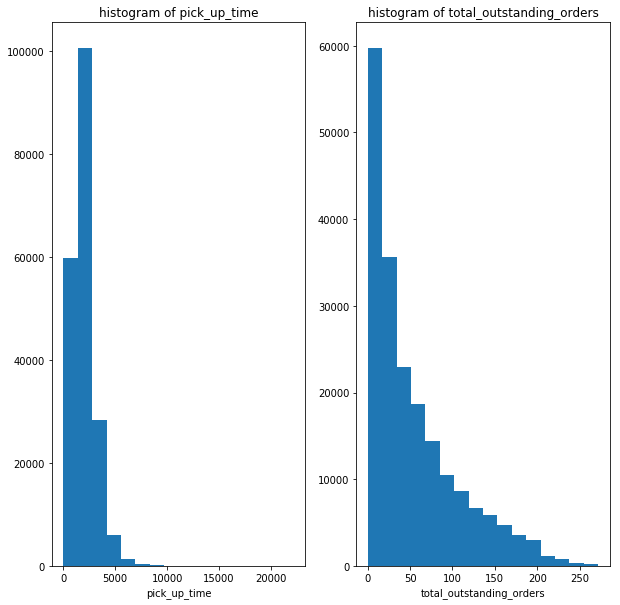

In [27]:
plot_hist(train_data, ['pick_up_time', 'total_outstanding_orders'])

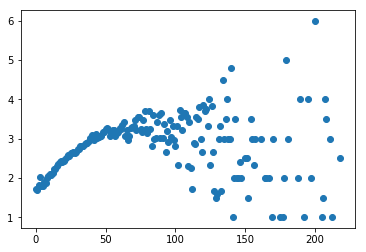

In [61]:
# we are seeing that when we there are high pick up times (>12 minutes) the number of items are generally small (< 8)
from scipy.stats import mode
from collections import Counter
train_data['time_of_day'] = pd.to_datetime(train_data['created_at']).dt.hour
train_data['total_available_dashers'] = (filt['total_onshift_dashers']-filt['total_busy_dashers'])
train_data = train_data[train_data['total_available_dashers'] >= 0]
ft = 'num_distinct_items'
train_data['pick_up_coarse'] = train_data['pick_up_time'].apply(lambda x: int(x/60))
#distinct = train_data[['pick_up_coarse', ft]].groupby('pick_up_coarse').apply(lambda x: Counter(x['order_protocol']).most_common(1)[0])
distinct = train_data[['pick_up_coarse', ft]].groupby('pick_up_coarse').mean()
#plt.scatter(distinct.index, [e[0] for e in distinct])
plt.scatter(distinct.index, distinct[ft])
#plt.xlim(0, 300)

100%|██████████| 1/1 [00:00<00:00, 121.54it/s]


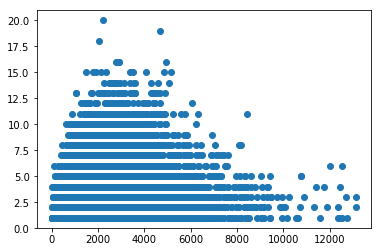

In [60]:
filt = filter_noise(train_data, ['pick_up_time'])
#filt = filt[filt['total_onshift_dashers']<filt['total_busy_dashers']]
#filt = filt[filt['pick_up_time']>5000]
plt.scatter(filt['pick_up_time'], filt['num_distinct_items'])

possible insights 
- some order protocol occur in-frequently on late orders (2 & 4)
- some features show clear relationship with prerict var in small ranges (0, 50 minutes for total orders processed)
- actual time of day maybe important to predict delivery time. It has an impact on number of busy dashers, time that it takes to get to the restaraunt (traffic)
- Weak correlation with the estimated_store_to_consumer_driving_duration. I thought that this could be a coarse measure of the traffic which would be similar to the traffic conditions that the driver would be in to pick up the food 

Per restaraunt analysis

In [67]:
from collections import Counter
Counter(train_data['store_id']).most_common(5)

[(3937, 482), (6917, 434), (6865, 417), (1311, 416), (4367, 412)]

plotting 3 plots


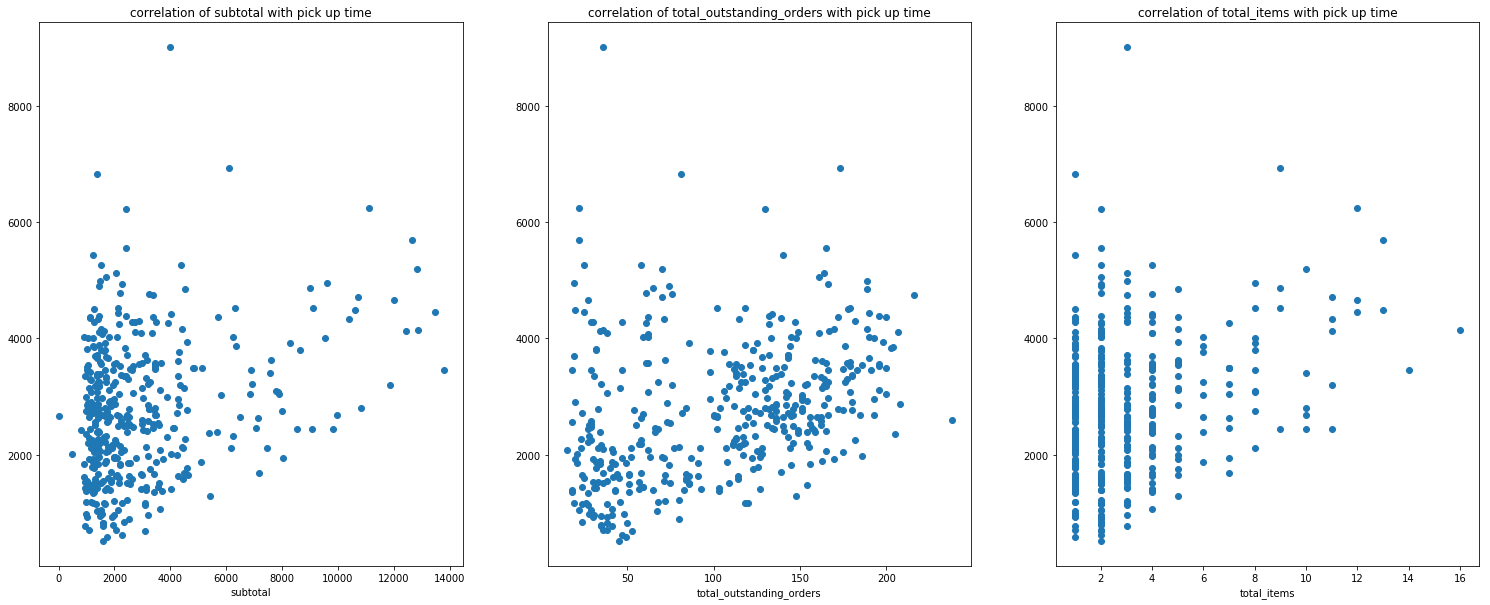

In [86]:
store_df = train_data[train_data['store_id'] == 4367]
#filt = filter_noise(train_data, ['pick_up_time'])
#filt = filt[filt['total_onshift_dashers']<filt['total_busy_dashers']]
#filt = filt[filt['pick_up_time']>5000]
#plt.scatter(store_df['subtotal'], store_df['pick_up_time'])
plot_correlation(store_df, ['subtotal', 'total_outstanding_orders', 'total_items'])